# Видеоигры на рынке: Анализ данных и перспективы



**Цель проекта:**
Цель проекта — выявить закономерности, определяющие успешность компьютерных игр, чтобы сделать ставку на потенциально популярные продукты и спланировать эффективные рекламные кампании для интернет-магазина «Стримчик».

**Краткий план:**

**Шаг 1.Изучение данных:**
- Загрузить данные из файла `/datasets/games.csv`.
- Изучить общую информацию о данных: типы данных, наличие пропусков и основные статистические характеристики.

***Шаг 2. Подготовка данных:***
- Привести названия столбцов к нижнему регистру.
- Преобразовать типы данных, где это необходимо.
- Обработать пропуски:
  - Определить причины пропусков.
  - Заполнить пропуски или объяснить, почему некоторые пропуски не следует заполнять.
  - Разобраться с аббревиатурой 'tbd' в столбце с оценкой пользователей.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 3. Исследовательский анализ данных:**
- Исследовать количество игр, выпускавшихся в разные годы.
- Проанализировать изменения продаж по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Определить актуальный период данных для прогноза на 2017 год.
- Выявить лидирующие платформы по продажам, а также платформы с растущими и падающими продажами.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Исследовать влияние отзывов пользователей и критиков на продажи игр внутри одной популярной платформы. Построить диаграмму рассеяния и посчитать корреляцию.
- Соотнести выводы с продажами игр на других платформах.
- Проанализировать распределение игр по жанрам и выявить самые прибыльные жанры.

**Шаг 4. Портрет пользователя каждого региона:**
- Определить для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5) и описать различия в долях продаж.
  - Самые популярные жанры (топ-5) и пояснить разницу.
  - Влияние рейтинга ESRB на продажи в отдельных регионах.

**Шаг 5. Проверка гипотез:**
- Проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.
- Сформулировать нулевые и альтернативные гипотезы.
- Применить критерий для проверки гипотез и пояснить выбор критерия.
- Установить пороговое значение alpha для проверки гипотез.
    
 

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Изучение данных:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns
import scipy.stats as st



In [2]:
# Загрузка данных
games_data = pd.read_csv('/datasets/games.csv')


In [3]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Шаг 2. Подготовка данных:

In [6]:
# Приведение названий столбцов к нижнему регистру
games_data.columns = games_data.columns.str.lower()

# Проверка изменений
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***Обработка дубликатов***

In [7]:
#проверка явных дубликатов
print(f"Количество дубликатов в games_data: {games_data.duplicated().sum()}")

Количество дубликатов в games_data: 0


In [8]:
duplicates = games_data[games_data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
print(f'Количество дубликатов: {len(duplicates)}')


Количество дубликатов: 4


In [9]:
games_data = games_data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')


In [10]:
duplicates = games_data[games_data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
print(f'Количество дубликатов: {len(duplicates)}')


Количество дубликатов: 0


In [11]:
unique_names = games_data['name'].unique()
print('Уникальные значения в столбце name:')
print(unique_names)

unique_platforms = games_data['platform'].unique()
print('Уникальные значения в столбце platform:')
print(unique_platforms)


Уникальные значения в столбце name:
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения в столбце platform:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**обработка пропусков**

In [12]:
# Проверка пропущенных значений в games_data
print("Проверка пропущенных значений в games_data:\n")
print(games_data.isna().sum())
print("Доля пропущенных значений в % games_data:\n")
print(games_data.isna().mean()*100)

Проверка пропущенных значений в games_data:

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64
Доля пропущенных значений в % games_data:

name                0.005983
platform            0.000000
year_of_release     1.609526
genre               0.005983
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319332
user_score         40.088554
rating             40.477473
dtype: float64


**Краткий вывод по данным**

Общее количество записей: **16,715 записей (игр)**.

Столбцы: **11 столбцов**, которые охватывают различные аспекты игр, такие как название, платформа, год выпуска, жанр, продажи в различных регионах, оценки критиков и пользователей, а также рейтинг ESRB.

Пропуски:

- Столбец Name имеет 2 пропуска.
- **Столбец Year_of_Release имеет 269 пропусков**, что составляет примерно 1.6% от общего количества записей.
- Столбец Genre также имеет 2 пропуска.
- **Столбец Critic_Score имеет 8,578 пропусков**, что составляет около 51.3% от общего количества записей.
- **Столбец User_Score имеет 6,701 пропуск**, что составляет около 40.1% от общего количества записей.
- **Столбец Rating имеет 6,766 пропусков**, что составляет около 40.5% от общего количества записей.

Типы данных:

Большинство столбцов имеют тип данных **float64 (6 столбцов)**.
Столбцы **Name, Platform, Genre, User_Score, и Rating** имеют тип данных **object**.

In [13]:
games_data=games_data.dropna(subset=['name'])

Столбец 'year_of_release' имеет 269 пропущенных значений, что составляет около 1.6% от общего количества записей. Эти пропуски удалим.

In [14]:
# Удаление записей с пропущенными значениями
games_data = games_data.dropna(subset=['year_of_release'])

In [15]:
games_data=games_data.dropna(subset=['genre'])

В столбцах critic_score и user_score пропущенные значения заполним -1, так как отсутствие оценки может свидетельствовать о том, что игра не была оценена.

In [16]:

games_data['critic_score'] = games_data['critic_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].fillna(-1)


In [17]:
# Проверим уникальные значения в столбце 'rating'
unique_rating = games_data['rating'].unique()
print(unique_rating)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Рейтинги ESRB (Entertainment Software Rating Board) расшифровываются следующим образом:

- E: ЕVERYONE (Все) 
- E10+: EVERYONE 10+ (Все от 10 лет) 
- T: TEEN (Подростки) 
- M: MATURE (Совершеннолетние)
- AO: ADULTS ONLY (Только для взрослых) 
- EC: EARLY CHILDHOOD (Раннее детство) 
- K-A: KIDS TO ADULTS (От детей до взрослых) 
- RP (Rating Pending): Рейтинг еще не определен. Это временный статус, который может быть присвоен игре, которая еще не прошла процесс оценки ESRB.

Пропуски в рейтинге могут возникать из-за того, что некоторые игры не были оценены ESRB, либо информация о рейтинге отсутствует для игр, выпущенных в других странах.

In [18]:
#Заменим пропущенные значения на "undefiend"
games_data["rating"] = games_data['rating'].fillna("undefined")

In [19]:
# Проверка пропущенных значений в games_data
print("Проверка пропущенных значений в games_data:\n")
print(games_data.isna().sum())
print("Доля пропущенных значений в % games_data:\n")
print(games_data.isna().mean()*100)

Проверка пропущенных значений в games_data:

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
Доля пропущенных значений в % games_data:

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64


**обработка типов данных**

In [20]:
# Рассмотрим типы данных в каждом столбце
print("Типы данных в каждом столбце:\n", games_data.dtypes, "\n")

Типы данных в каждом столбце:
 name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object 



In [21]:
# заменим на целочисленный тип, т.к. год - целое число
games_data['year_of_release'] = games_data['year_of_release'].astype(int)


In [22]:
# Проверим уникальные значения в столбце 'critic_score'
unique_critic_score = games_data['critic_score'].unique()
print(unique_critic_score)

[76. -1. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [23]:
# как видно, это целые значения с точкой, можно менять на целочисленный тип
games_data['critic_score'] = games_data['critic_score'].astype(int)

In [24]:
# Проверим уникальные значения в столбце 'user_score'
games_data['user_score'].unique()


array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратимся к аббревиатуре 'tbd' в столбце с оценками пользователей. Это сокращение от "to be determined", что означает "будет определено". Это может указывать на то, что оценка пользователя еще не была выставлена или что она еще не была опубликована. Заменим значение 'tbd' на -1 и приведем столбец к вещественному типу.

In [25]:
games_data['user_score'] = games_data['user_score'].replace('tbd', -1)
games_data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [26]:
games_data['user_score'] = games_data['user_score'].astype(float)


Используем тип category для столбца 'rating', т.к. данные в этом столбце представляют собой категориальные переменные (в нашем случае рейтинги), что может помочь при анализе данных и визуализации.

In [27]:
# Преобразование столбца 'rating' в тип 'category'
games_data['rating'] = games_data['rating'].astype('category')


In [28]:
# Проверим типы данных после преобразования
print("Типы данных после преобразования:\n", games_data.dtypes, "\n")


Типы данных после преобразования:
 name                 object
platform             object
year_of_release       int64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score          int64
user_score          float64
rating             category
dtype: object 



In [29]:
# Подсчет суммарных продаж во всех регионах
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined,31.38


В ходе анализа и обработки данных было выявлено следующее:

- Пропуски в данных: Были обнаружены пропуски в столбцах name, year_of_release, genre, rating, critic_score и user_score.
- Удаление пропусков: Были удалены записи с пропущенными значениями в столбцах name, year_of_release и genre.
- Заполнение пропусков и преобразование типов данных: Пропуски в столбце critic_score и user_score были заполнены значением -1, столбцы были приведены к целому и вещественному типу соответственно.
- Столбец 'year_of_release' приведен у целому типу, столбец 'rating' к типу category. 
- Пропущенные значения в 'rating' заменены на "undefined".
- Добавление нового столбца: Был добавлен новый столбец total_sales, который представляет собой сумму продаж во всех регионах.

In [30]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  object  
 2   year_of_release  16443 non-null  int64   
 3   genre            16443 non-null  object  
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     16443 non-null  int64   
 9   user_score       16443 non-null  float64 
 10  rating           16443 non-null  category
 11  total_sales      16443 non-null  float64 
dtypes: category(1), float64(6), int64(2), object(3)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin

# Шаг 3. Исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Чтобы проанализировать, сколько игр выпускалось в разные годы, мы можем сгруппировать данные по year_of_release и подсчитать количество игр, выпущенных в каждом году. Затем мы можем визуализировать эти данные, чтобы лучше понять тенденции.



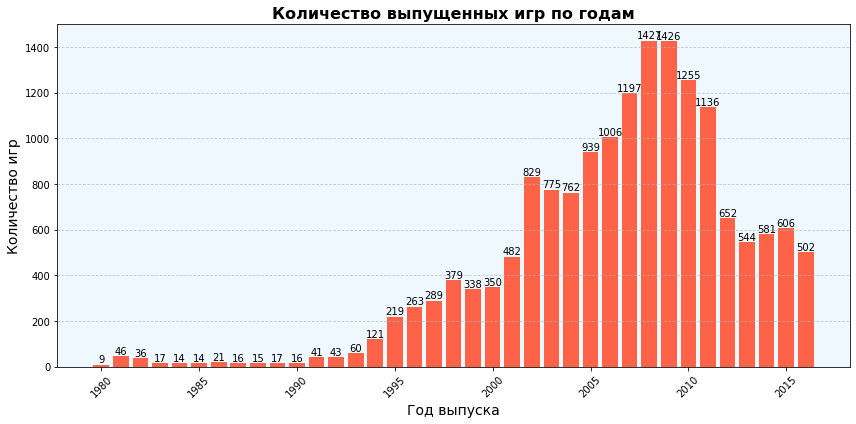

In [31]:
# Группировка по годам и подсчет количества игр
games_per_year = games_data['year_of_release'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(games_per_year.index, games_per_year.values, color='#FF6347')  # Используем яркий цвет (томатный)

# Добавление аннотаций на график
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Количество выпущенных игр по годам', fontsize=16, fontweight='bold')
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Изменение стиля сетки

# Настройка фона
plt.gca().set_facecolor('#f0f8ff')  # Цвет фона графика

plt.tight_layout()
plt.show()

Начиная с 1995 года, наблюдается значительный рост количества выпущенных игр. Особенно заметен скачок в 2001 году, когда было выпущено 482 игры, и в 2002 году, когда количество игр достигло 829.
Пик выпуска игр пришелся на 2008 год, когда было выпущено 1427 игр. Это может быть связано с ростом популярности видеоигр и увеличением числа платформ и жанров.

Падение после пиков:

После достижения пиков в 2008 году наблюдается снижение количества выпущенных игр. В 2009 и 2010 годах количество игр остается высоким, но затем начинает постепенно снижаться.
В 2012 и 2013 годах количество игр значительно сокращается, что может указывать на насыщение рынка и возможные изменения в предпочтениях потребителей.
Данные за последние годы (например, 2015-2016) показывают, что количество игр продолжает снижаться.

Важно **уделить внимание данным за последние 10-12 лет**, так как они могут лучше отражать современные тренды и предпочтения игроков.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

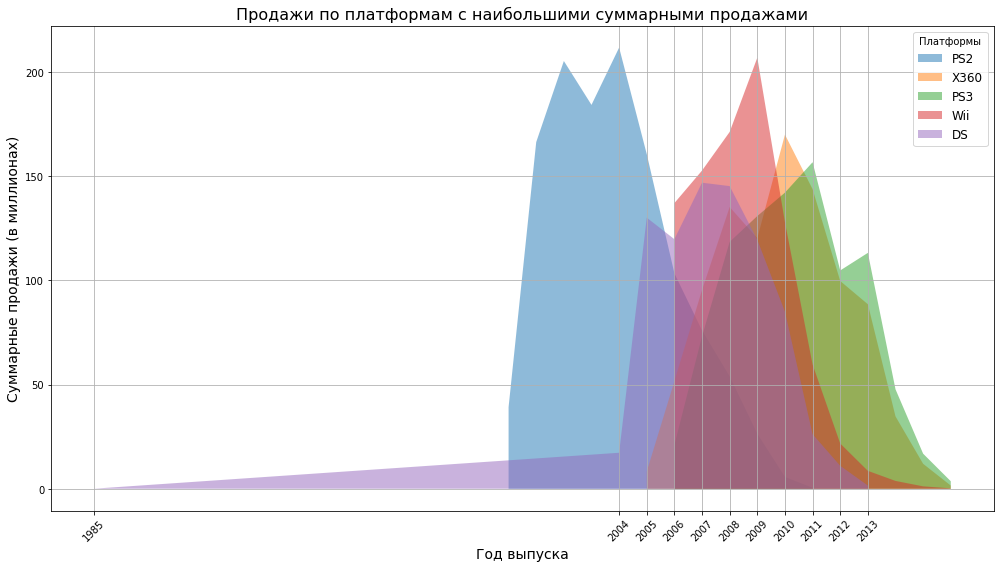

In [32]:
# Суммирование продаж по платформам
platform_sales = games_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Выбор платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(5, 'total_sales')

# Фильтрация данных по выбранным платформам
top_platforms_names = top_platforms.index.tolist()
sales_by_year_and_platform = games_data[games_data['platform'].isin(top_platforms_names)].groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Визуализация
plt.figure(figsize=(14, 8))

# Создание графика с областями
for platform in top_platforms_names:
    subset = sales_by_year_and_platform[sales_by_year_and_platform['platform'] == platform]
    plt.fill_between(subset['year_of_release'], 
                     subset['na_sales'] + subset['eu_sales'] + subset['jp_sales'] + subset['other_sales'], 
                     label=platform, alpha=0.5)

plt.title('Продажи по платформам с наибольшими суммарными продажами', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.xticks(subset['year_of_release'].unique(), rotation=45)
plt.legend(title='Платформы', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

Действительно, вики говорит, что [консоль была выпущена в 2004 году в Канаде, США и Японии](https://ru.wikipedia.org/wiki/Nintendo_DS)


In [33]:
games_data[(games_data['platform'] =='DS') & (games_data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


In [34]:
# исключаем ошибочные данные
games_data = games_data[~((games_data['platform'] =='DS') & (games_data['year_of_release'] == 1985))]


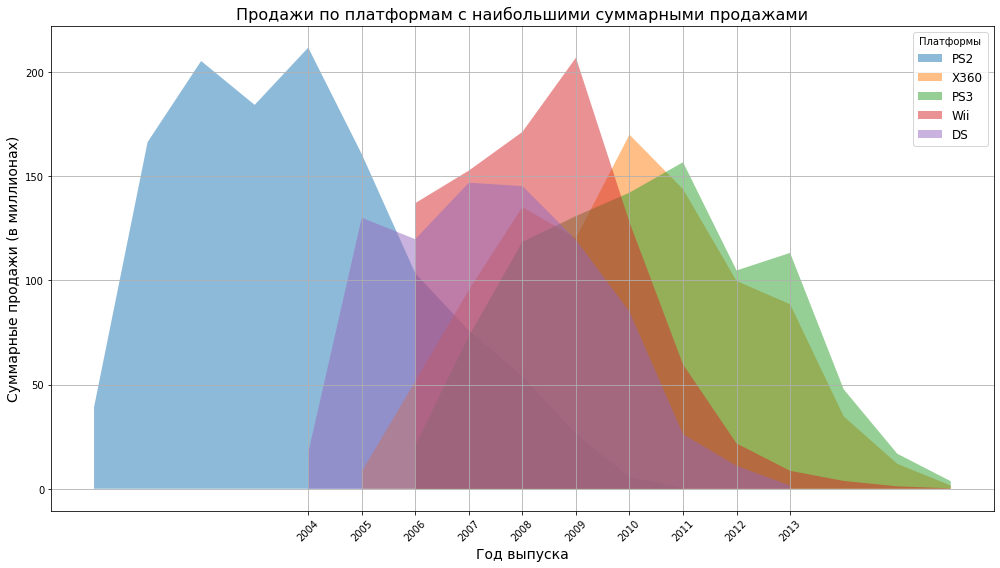

In [35]:
# Суммирование продаж по платформам
platform_sales = games_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()


# Выбор платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(5, 'total_sales')

# Фильтрация данных по выбранным платформам
top_platforms_names = top_platforms.index.tolist()
sales_by_year_and_platform = games_data[games_data['platform'].isin(top_platforms_names)].groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales']].sum().reset_index()

# Визуализация
plt.figure(figsize=(14, 8))

# Создание графика с областями
for platform in top_platforms_names:
    subset = sales_by_year_and_platform[sales_by_year_and_platform['platform'] == platform]
    plt.fill_between(subset['year_of_release'], 
                     subset['na_sales'] + subset['eu_sales'] + subset['jp_sales'] + subset['other_sales'], 
                     label=platform, alpha=0.5)

plt.title('Продажи по платформам с наибольшими суммарными продажами', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.xticks(subset['year_of_release'].unique(), rotation=45)
plt.legend(title='Платформы', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

In [36]:

# Вывод таблицы
sales_by_year_and_platform


,year_of_release,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2000,PS2,16.08,10.64,8.87,3.58,39.17
1,2001,PS2,79.49,52.37,17.79,16.78,166.43
2,2002,PS2,96.54,65.27,21.85,21.72,205.38
3,2003,PS2,83.54,61.20,18.88,20.69,184.31
4,2004,DS,8.33,3.93,3.65,1.36,17.27
5,2004,PS2,96.78,56.01,19.17,39.85,211.81
6,2005,DS,47.99,41.49,29.86,10.80,130.14
7,2005,PS2,85.60,40.86,15.05,19.15,160.66
8,2005,X360,6.90,0.43,0.28,0.64,8.25
9,2006,DS,50.01,23.07,38.56,8.17,119.81


In [37]:
# Продажи по платформам с наибольшими суммарными продажами за весь период
platform_sales.groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)[0:5]

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,928.78
Wii,891.18
DS,802.76


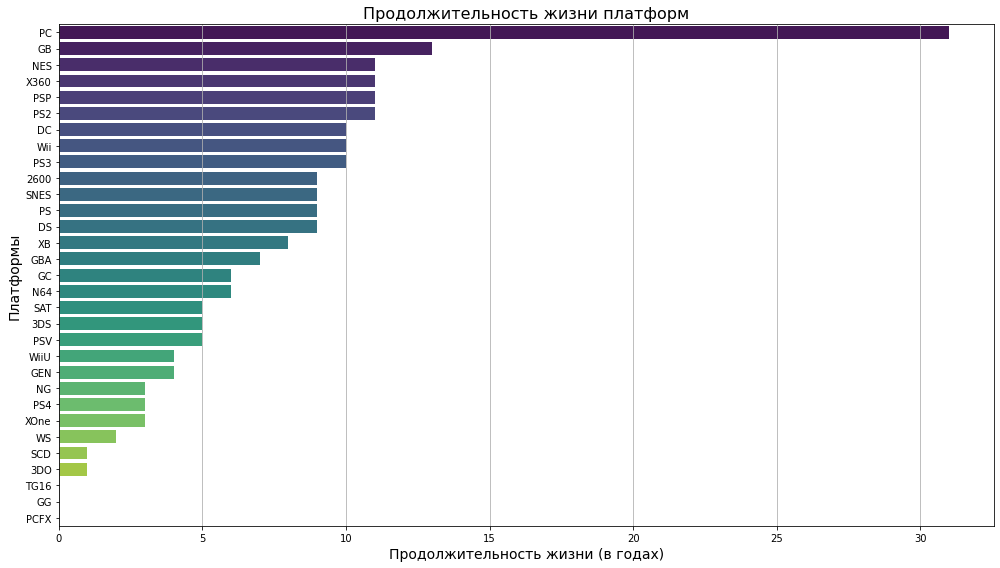

In [38]:
# Получение года выпуска для каждой платформы
platform_years = games_data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_years.columns = ['platform', 'first_year', 'last_year']

# Определение продолжительности жизни платформ
platform_years['lifetime'] = platform_years['last_year'] - platform_years['first_year']


# Сортировка по продолжительности жизни
platform_years = platform_years.sort_values(by='lifetime', ascending=False)


# Визуализация
plt.figure(figsize=(14, 8))
sns.barplot(x='lifetime', y='platform', data=platform_years, palette='viridis')
plt.title('Продолжительность жизни платформ', fontsize=16)
plt.xlabel('Продолжительность жизни (в годах)', fontsize=14)
plt.ylabel('Платформы', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [39]:
# Комментарий ревьюера
temp = games_data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [40]:
# Вывод информации о платформах
platform_years.sort_values(by='first_year')


,platform,first_year,last_year,lifetime
0,2600,1980,1989,9
11,NES,1983,1994,11
13,PC,1985,2016,31
5,GB,1988,2001,13
8,GEN,1990,1994,4
23,SNES,1990,1999,9
9,GG,1992,1992,0
22,SCD,1993,1994,1
12,NG,1993,1996,3
1,3DO,1994,1995,1


In [41]:
platform_years['lifetime'].describe ()

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifetime, dtype: float64

In [42]:
# Фильтрация данных за период с 2012 по 2016 год
filtered_data = games_data[(games_data['year_of_release'] >= 2012) & (games_data['year_of_release'] <= 2016)]

# Суммирование продаж по платформам
platform_sales = filtered_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()


# Выбор платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(5, 'total_sales')

print(top_platforms)
# Фильтрация данных по выбранным платформам
top_platforms_names = top_platforms.index.tolist()


sales_by_year_and_platform = filtered_data[filtered_data['platform'].isin(top_platforms_names)].groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales']].sum().reset_index()

sales_by_year_and_platform




          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS4         108.74    141.09     15.96        48.35       314.14
PS3         101.27    106.64     35.29        43.03       286.23
X360        140.05     74.52      1.57        20.40       236.54
3DS          55.31     42.64     87.79         8.87       194.61
XOne         93.12     51.59      0.34        14.27       159.32


,year_of_release,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2012,3DS,17.11,11.68,19.98,2.59,51.36
1,2012,PS3,37.77,38.83,11.94,16.26,104.80
2,2012,X360,58.39,32.00,1.06,8.29,99.74
3,2013,3DS,15.56,14.84,23.57,2.60,56.57
4,2013,PS3,41.45,42.27,12.13,17.40,113.25
5,2013,PS4,10.13,11.05,0.94,3.87,25.99
6,2013,X360,53.36,27.03,0.43,7.76,88.58
7,2013,XOne,11.85,5.34,0.02,1.75,18.96
8,2014,3DS,12.33,8.73,20.69,2.01,43.76
9,2014,PS3,16.39,18.24,6.25,6.88,47.76


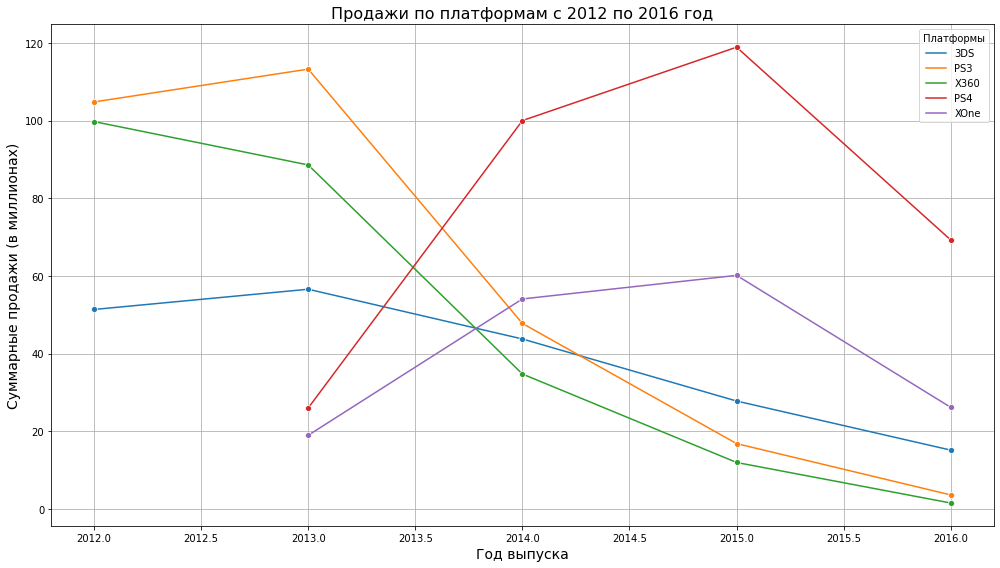

In [43]:
# Визуализация данных
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_year_and_platform, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Продажи по платформам с 2012 по 2016 год', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.grid()
plt.legend(title='Платформы')
plt.tight_layout()
plt.show()


</font><font color='Blue'><b>Используем данные за период с 2012 по 2016 год</b></font><br>

In [44]:
# Создание сводной таблицы 'Продажи по платформам с 2012 по 2016 год'
trend_summary = sales_by_year_and_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Вывод сводной таблицы
trend_summary

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012,51.36,104.80,0.00,99.74,0.00
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


In [45]:
#топ-5 по продажам за период 2012 - 2016

sales_by_year_and_platform.groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)[:5]

,total_sales
platform,
PS4,314.14
PS3,286.23
X360,236.54
3DS,194.61
XOne,159.32


In [46]:
# Фильтруем данные за 2016 год
sales_by_year_and_platform[sales_by_year_and_platform['year_of_release'] == 2016].groupby('platform')[['total_sales']].sum().groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)[:5]

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PS3,3.60
X360,1.52


Лидируют по продажам: PS4, PS3, X360, 3DS, XOne (в 2016 году)

Растут: PS4, XOne (относительно недавно вышли на рынок и все еще набирают обороты)

Падают: PS3, X360, 3DS

**Потенциально прибыльные платформы:**
- PS4 
- XOne



In [47]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2885 non-null   object  
 1   platform         2885 non-null   object  
 2   year_of_release  2885 non-null   int64   
 3   genre            2885 non-null   object  
 4   na_sales         2885 non-null   float64 
 5   eu_sales         2885 non-null   float64 
 6   jp_sales         2885 non-null   float64 
 7   other_sales      2885 non-null   float64 
 8   critic_score     2885 non-null   int64   
 9   user_score       2885 non-null   float64 
 10  rating           2885 non-null   category
 11  total_sales      2885 non-null   float64 
dtypes: category(1), float64(6), int64(2), object(3)
memory usage: 273.6+ KB


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

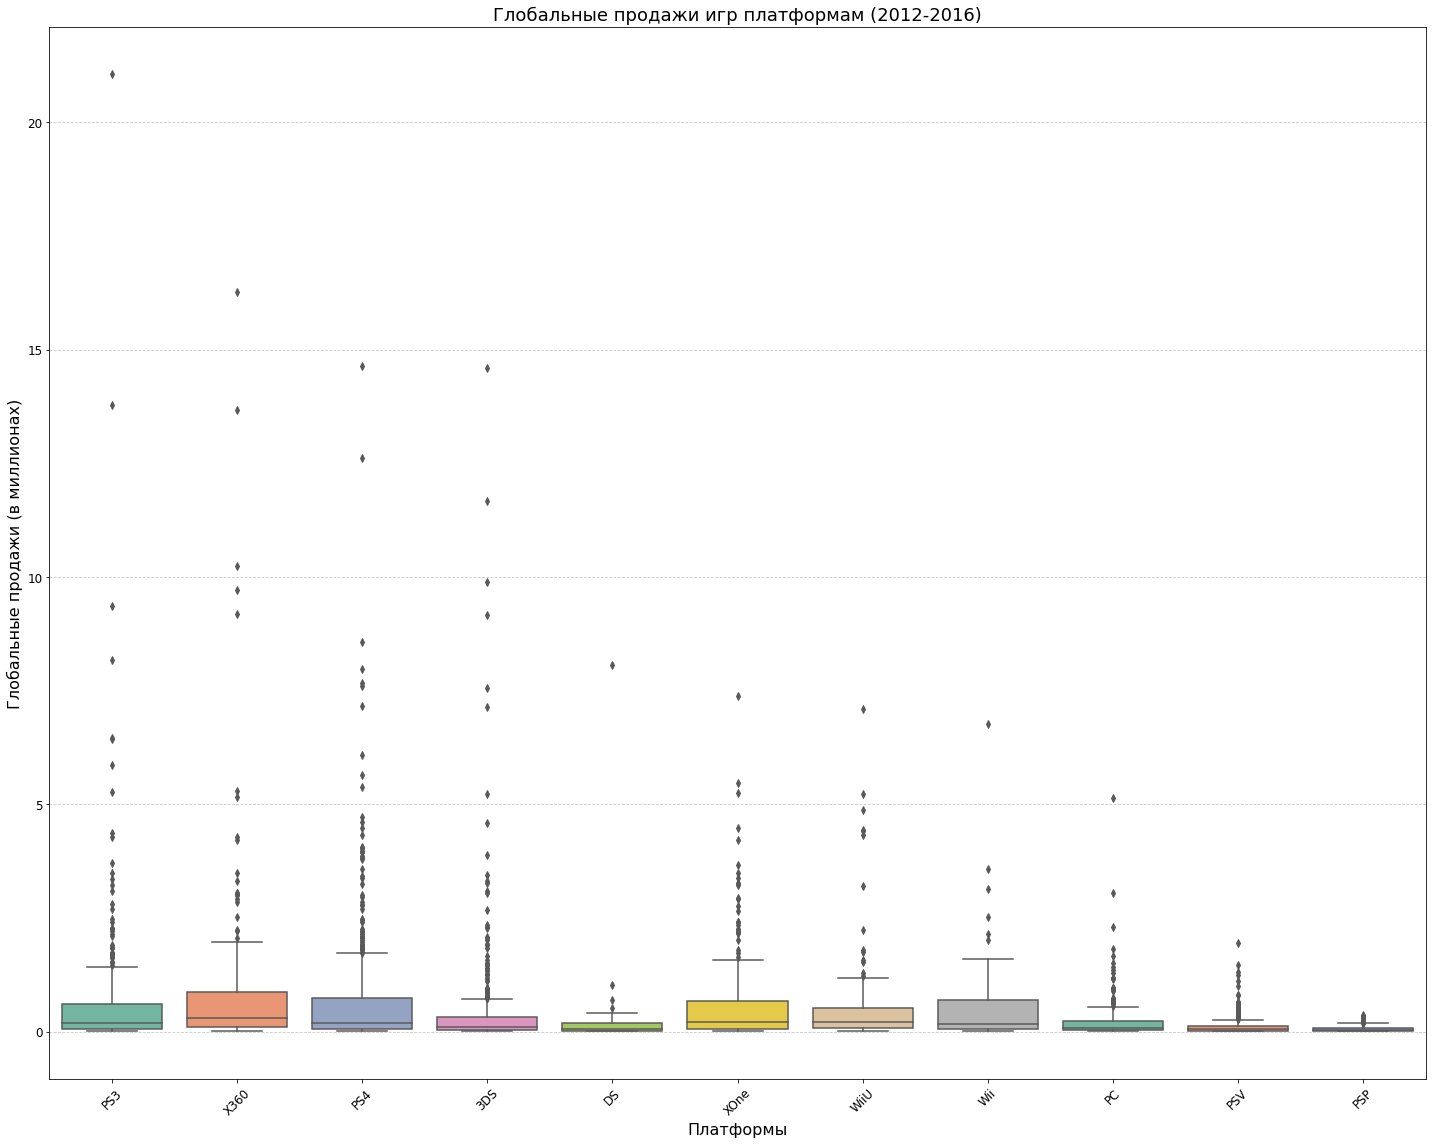

In [48]:


plt.figure(figsize=(20, 16))
sns.boxplot(x='platform', y='total_sales', data=filtered_data, palette='Set2')

plt.title('Глобальные продажи игр платформам (2012-2016)', fontsize=18)
plt.xlabel('Платформы', fontsize=16)
plt.ylabel('Глобальные продажи (в миллионах)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


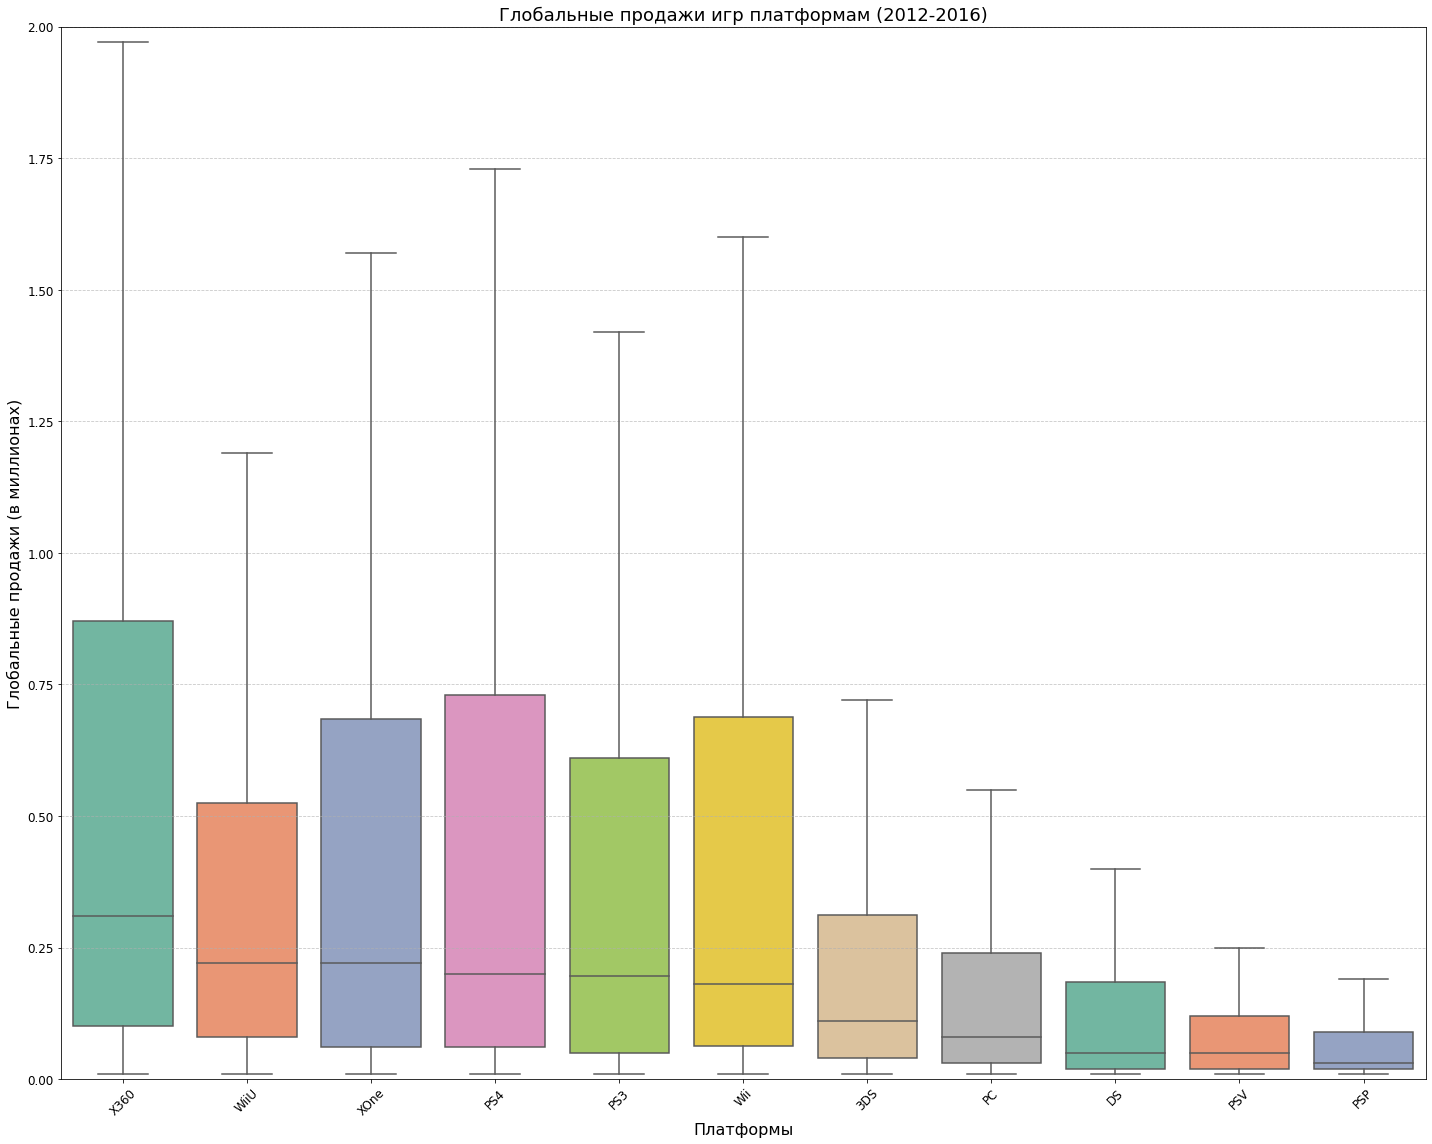

In [49]:
# Создаем новый индекс для сортировки
sorted_indices = filtered_data.groupby(['platform'])['total_sales'].median().sort_values(ascending=False).index

# Используем новый индекс для перестановки данных
sorted_data = filtered_data.set_index('platform').loc[sorted_indices].reset_index()

# Рисуем график с отсортированными данными
plt.figure(figsize=(20, 16))
sns.boxplot(x='platform', y='total_sales', data=sorted_data, palette='Set2', showfliers=False)

plt.title('Глобальные продажи игр платформам (2012-2016)', fontsize=18)
plt.xlabel('Платформы', fontsize=16)
plt.ylabel('Глобальные продажи (в миллионах)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Общие продажи:

Лидеры: X360, PS4, Wii, XOne, PS3, WiiU 

Медиана продаж:

X360 имеет наивысшую медиану, указывая на успешность большинства игр.



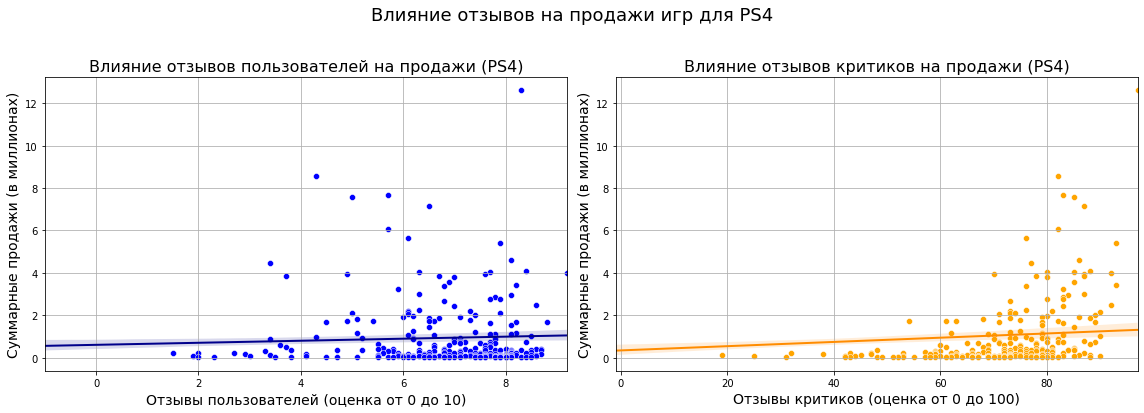

Коэффициент корреляции между отзывами пользователей и продажами: 0.12
Коэффициент корреляции между отзывами критиков и продажами: 0.23


In [50]:
# Фильтрация данных для платформы PS4
ps4_data = filtered_data[filtered_data['platform'] == 'PS4']

# Фильтрация отзывов пользователей 
ps4_data_user = ps4_data[ps4_data['user_score'] >= 0]
# Фильтрация отзывов критиков
ps4_data_critic = ps4_data[ps4_data['critic_score'] >= 0]


# Создание подграфиков
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Диаграмма рассеяния для отзывов пользователей
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data_user, ax=ax[0], color='blue', edgecolor='w')
sns.regplot(x='user_score', y='total_sales', data=ps4_data, ax=ax[0], scatter=False, color='darkblue', line_kws={"linewidth": 2})

ax[0].set_title('Влияние отзывов пользователей на продажи (PS4)', fontsize=16)
ax[0].set_xlabel('Отзывы пользователей (оценка от 0 до 10)', fontsize=14)
ax[0].set_ylabel('Суммарные продажи (в миллионах)', fontsize=14)
ax[0].grid(True)



# Диаграмма рассеяния для отзывов критиков
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data_critic, ax=ax[1], color='orange', edgecolor='w')
sns.regplot(x='critic_score', y='total_sales', data=ps4_data, ax=ax[1], scatter=False, color='darkorange', line_kws={"linewidth": 2})

ax[1].set_title('Влияние отзывов критиков на продажи (PS4)', fontsize=16)
ax[1].set_xlabel('Отзывы критиков (оценка от 0 до 100)', fontsize=14)
ax[1].set_ylabel('Суммарные продажи (в миллионах)', fontsize=14)
ax[1].grid(True)

# Настройка общего заголовка
plt.suptitle('Влияние отзывов на продажи игр для PS4', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Расчет корреляции между отзывами пользователей и продажами
user_sales_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Коэффициент корреляции между отзывами пользователей и продажами: {user_sales_corr:.2f}')

# Расчет корреляции между отзывами критиков и продажами
critic_sales_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f'Коэффициент корреляции между отзывами критиков и продажами: {critic_sales_corr:.2f}')

Коэффициент корреляции между отзывами пользователей и продажами: 0.12

Слабая положительная корреляция. Это означает, что отзывы пользователей слабо влияют на продажи игр на PS4.

Коэффициент корреляции между отзывами критиков и продажами: 0.23

Слабая положительная корреляция, но чуть более выраженная, чем у пользователей. Критические отзывы имеют немного большее влияние на продажи, но связь все равно остается слабой.

**Во всех случаях коэффициент корреляции положительный, что указывает на наличие прямой связи между качеством отзывов (как от пользователей, так и от критиков) и продажами игр. Однако сила этой связи варьируется в зависимости от платформы и источника отзывов.**

Wii: На этой платформе наблюдается самая сильная корреляция между отзывами и продажами, особенно для отзывов пользователей (0,62). 

Во всех случаях, кроме Wii, корреляция между отзывами критиков и продажами выше, чем между отзывами пользователей и продажами. Это может указывать на то, что мнения критиков в целом имеют большее влияние на продажи игр, чем мнения пользователей.

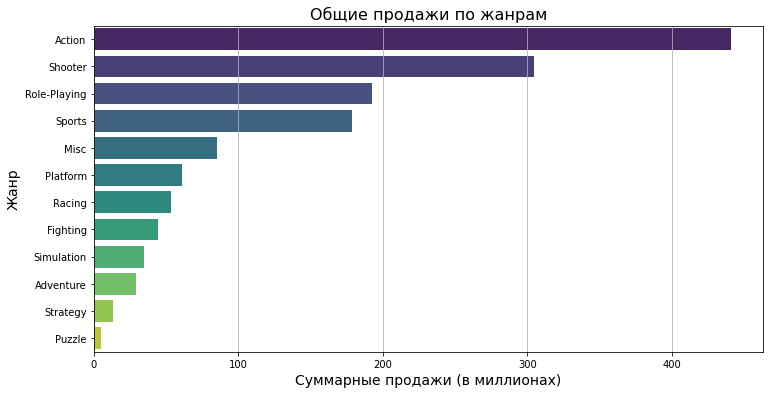

Самые прибыльные жанры:
           genre  total_sales
0         Action       441.12
8        Shooter       304.73
7   Role-Playing       192.80
10        Sports       178.51
3           Misc        85.04

Менее прибыльные жанры:
         genre  total_sales
2     Fighting        44.49
9   Simulation        35.12
1    Adventure        29.43
11    Strategy        13.34
5       Puzzle         4.89


In [52]:
# Группировка данных по жанрам и суммирование продаж
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().reset_index()

# Сортировка по продажам
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=genre_sales, palette='viridis')
plt.title('Общие продажи по жанрам', fontsize=16)
plt.xlabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.ylabel('Жанр', fontsize=14)
plt.grid(axis='x')
plt.show()

# Вывод информации о самых прибыльных жанрах
print("Самые прибыльные жанры:")
print(genre_sales.head(5))

print("\nМенее прибыльные жанры:")
print(genre_sales.tail(5))

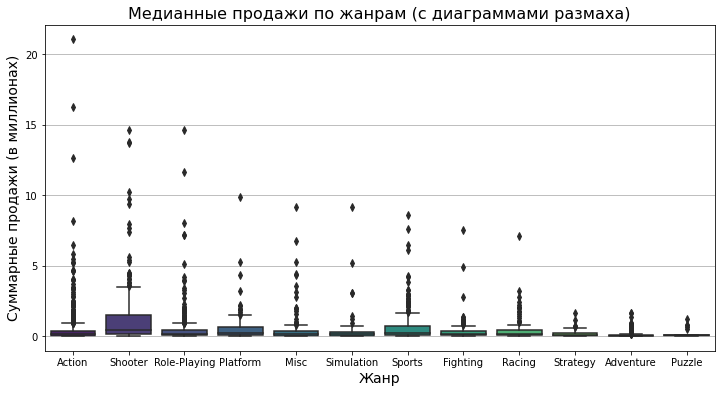

In [53]:
# Группировка данных по жанрам и вычисление медианных продаж
genre_median_sales = filtered_data.groupby('genre')['total_sales'].median().reset_index()

# Визуализация медианных продаж с использованием диаграмм размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=filtered_data, whis=1.5, palette='viridis')
plt.title('Медианные продажи по жанрам (с диаграммами размаха)', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.grid(axis='y')
plt.show()


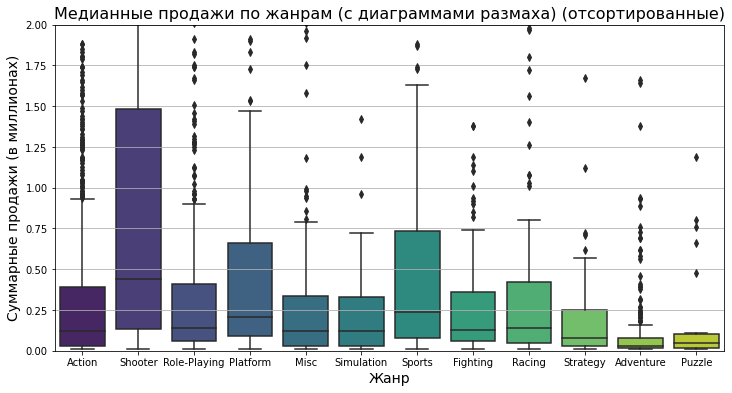

Медианные продажи по жанрам (отсортированные):
           genre  total_sales
8        Shooter        0.440
10        Sports        0.240
4       Platform        0.210
7   Role-Playing        0.140
6         Racing        0.140
2       Fighting        0.130
0         Action        0.120
3           Misc        0.120
9     Simulation        0.120
11      Strategy        0.080
5         Puzzle        0.045
1      Adventure        0.030


In [54]:
# Сортировка по медианным продажам
genre_median_sales_sorted = genre_median_sales.sort_values(by='total_sales', ascending=False)

# Визуализация медианных продаж с использованием диаграмм размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=filtered_data, whis=1.5, palette='viridis')
plt.title('Медианные продажи по жанрам (с диаграммами размаха) (отсортированные)', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.grid(axis='y')
plt.ylim(0, 2)
plt.show()

# Вывод информации о медианных продажах
print("Медианные продажи по жанрам (отсортированные):")
print(genre_median_sales_sorted)


**Выводы по третьему шагу:**

- **Количество выпущенных игр:**

Начиная с 1995 года, наблюдается значительный рост количества выпущенных игр. Особенно заметен скачок в 2001 году, когда было выпущено 482 игры, и в 2002 году, когда количество игр достигло 829. Пик выпуска игр пришелся на 2008 год, когда было выпущено 1427 игр. После этого наблюдается снижение количества выпущенных игр.

- **Продажи по платформам:** 

Платформы с наибольшими суммарными продажами за весь период: PS2, X360, PS3, Wii, DS. Продажи по платформам с наибольшими суммарными продажами за период с 2012 по 2016 год: X360, PS4, Wii, XOne, PS3, WiiU.

X360 имеет наивысшую медиану.


- **Продолжительность жизни платформ:** Средняя продолжительность жизни платформ составляет 7 лет ± 5.9 лет.


- **Влияние отзывов пользователей и критиков на продажи:**

В большинстве случаев наблюдается **слабая положительная корреляция между отзывами пользователей и продажами игр, а также между отзывами критиков и продажами.** Однако сила этой корреляции варьируется в зависимости от платформы и источника отзывов. Wii имеет самую сильную корреляцию между отзывами и продажами, особенно для отзывов пользователей. В остальных случаях **корреляция между отзывами критиков и продажами выше, чем между отзывами пользователей и продажами.**

- **Распределение игр по жанрам:**

Диаграммы размаха для медианных продаж по жанрам показывают, что Shooter, Sports, Platform, Role-Playing и Racing имеют самые высокие медианные продажи, в то время как Puzzle, Adventure и Strategy имеют самые низкие медианные продажи.

# Шаг 4. Портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.**

In [55]:
# Анализ платформ
# Группировка данных по платформам и суммирование продаж по регионам
platform_sales =filtered_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Получение топ-5 платформ по каждому региону
top_platforms_na = platform_sales.nlargest(5, 'na_sales')[['platform', 'na_sales']]
top_platforms_eu = platform_sales.nlargest(5, 'eu_sales')[['platform', 'eu_sales']]
top_platforms_jp = platform_sales.nlargest(5, 'jp_sales')[['platform', 'jp_sales']]

# Вывод результатов
print("Топ-5 платформ по регионам (с 2012 года):")
print("\nNA:\n",top_platforms_na)
print("\nEU:\n", top_platforms_eu)
print("\nJP:\n", top_platforms_jp)

Топ-5 платформ по регионам (с 2012 года):

NA:
    platform  na_sales
9      X360    140.05
4       PS4    108.74
3       PS3    101.27
10     XOne     93.12
0       3DS     55.31

EU:
    platform  eu_sales
4       PS4    141.09
3       PS3    106.64
9      X360     74.52
10     XOne     51.59
0       3DS     42.64

JP:
   platform  jp_sales
0      3DS     87.79
3      PS3     35.29
6      PSV     21.04
4      PS4     15.96
8     WiiU     13.01


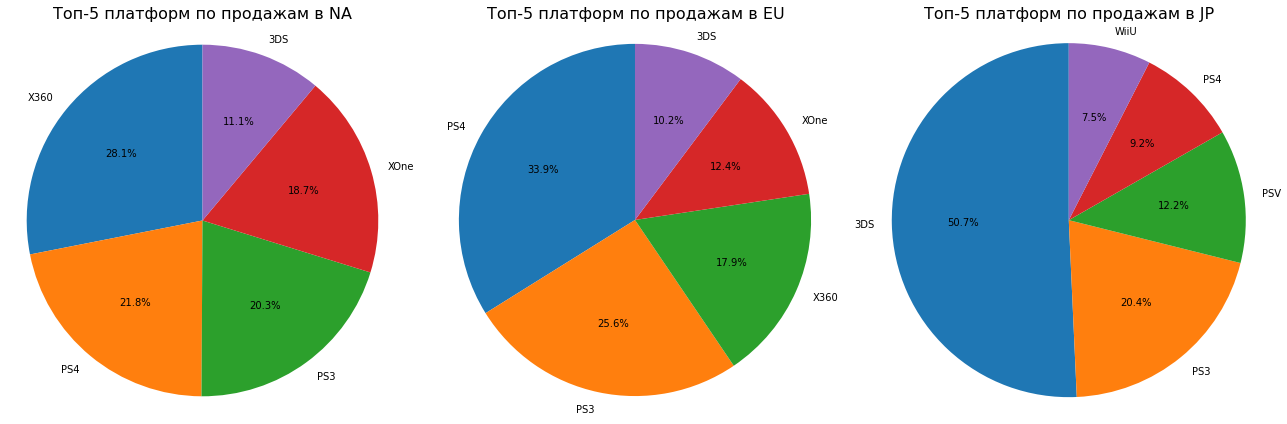

In [56]:
plt.figure(figsize=(18, 6))

# График для NA
plt.subplot(1, 3, 1)
top_platforms_na_sales = top_platforms_na['na_sales'].tolist()
plt.pie(top_platforms_na_sales, labels=top_platforms_na['platform'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 платформ по продажам в NA', fontsize=16)
plt.axis('equal')

# График для EU
plt.subplot(1, 3, 2)
top_platforms_eu_sales = top_platforms_eu['eu_sales'].tolist()
plt.pie(top_platforms_eu_sales, labels=top_platforms_eu['platform'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 платформ по продажам в EU', fontsize=16)
plt.axis('equal')

# График для JP
plt.subplot(1, 3, 3)
top_platforms_jp_sales = top_platforms_jp['jp_sales'].tolist()
plt.pie(top_platforms_jp_sales, labels=top_platforms_jp['platform'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 платформ по продажам в JP', fontsize=16)
plt.axis('equal')

plt.tight_layout()
plt.show()


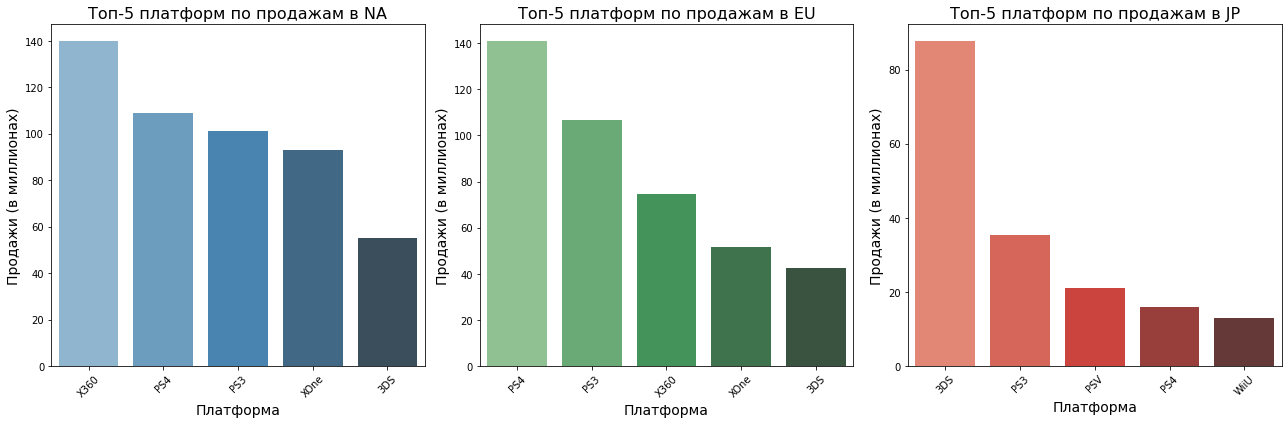

In [57]:
# Визуализация
plt.figure(figsize=(18, 6))

# График для NA
plt.subplot(1, 3, 1)
sns.barplot(data=top_platforms_na, x='platform', y='na_sales', palette='Blues_d')
plt.title('Топ-5 платформ по продажам в NA', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

# График для EU
plt.subplot(1, 3, 2)
sns.barplot(data=top_platforms_eu, x='platform', y='eu_sales', palette='Greens_d')
plt.title('Топ-5 платформ по продажам в EU', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

# График для JP
plt.subplot(1, 3, 3)
sns.barplot(data=top_platforms_jp, x='platform', y='jp_sales', palette='Reds_d')
plt.title('Топ-5 платформ по продажам в JP', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Лидерство платформ:**
- NA: X360 занимает первое место, что указывает на предпочтение к консолям Microsoft. PS4 и PS3 также показывают значительные продажи.
- EU: PS4 является лидером, что свидетельствует о предпочтениях пользователей к Sony. PS3 и X360 следуют за ней с меньшими объемами.
- JP: 3DS доминирует, подтверждая сильные позиции Nintendo. PS3 и PSV также показывают хорошие результаты.

**Различия в продажах:**
- В NA X360 значительно превышает продажи других платформ.
- В EU PS4 доминирует на рынке с большим отрывом от других платформ.
- В JP 3DS является безусловным лидером, что говорит о сильных позициях Nintendo в Японии.

**Общие тенденции:**

PlayStation и Xbox обладают сильными позициями на рынке в Северной Америке и Европе, в то время как Nintendo занимает лидирующие позиции в Японии



In [58]:
# Анализ жанров
# Группировка данных по жанрам и суммирование продаж по регионам
genre_sales = filtered_data.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Получение топ-5 жанров по каждому региону
top_genres_na = genre_sales.nlargest(5, 'na_sales')[['genre', 'na_sales']]
top_genres_eu = genre_sales.nlargest(5, 'eu_sales')[['genre', 'eu_sales']]
top_genres_jp = genre_sales.nlargest(5, 'jp_sales')[['genre', 'jp_sales']]

# Вывод результатов
print("\nТоп-5 жанров по регионам:")
print("\nNA:\n", top_genres_na)
print("\nEU:\n", top_genres_eu)
print("\nJP:\n", top_genres_jp)


Топ-5 жанров по регионам:

NA:
            genre  na_sales
0         Action    177.84
8        Shooter    144.77
10        Sports     79.42
7   Role-Playing     64.00
3           Misc     38.19

EU:
            genre  eu_sales
0         Action    159.34
8        Shooter    113.47
10        Sports     68.87
7   Role-Playing     48.53
6         Racing     27.29

JP:
           genre  jp_sales
7  Role-Playing     65.44
0        Action     52.80
3          Misc     12.86
9    Simulation     10.41
2      Fighting      9.44


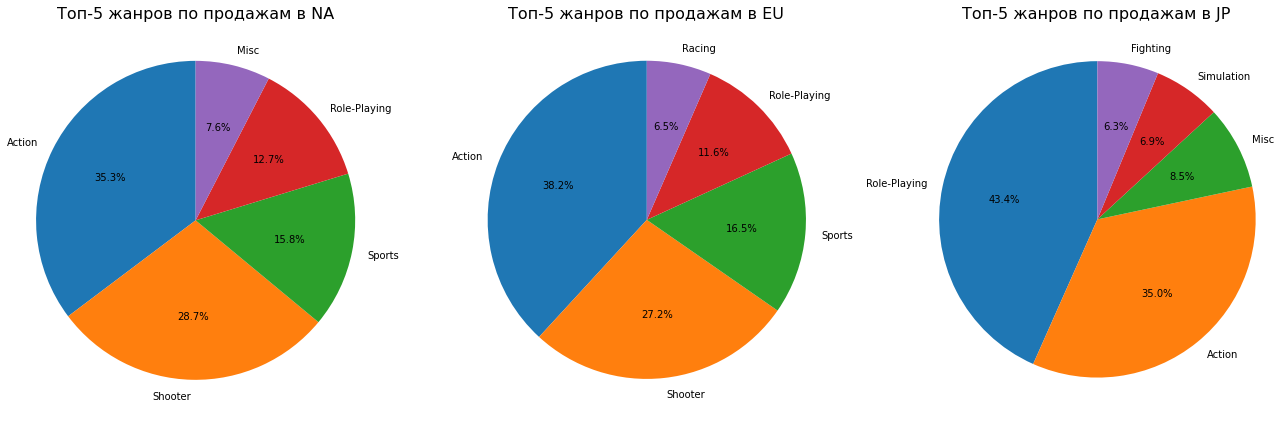

In [59]:
plt.figure(figsize=(18, 6))

# График для NA
plt.subplot(1, 3, 1)
top_genres_na_sales = top_genres_na['na_sales'].tolist()
plt.pie(top_genres_na_sales, labels=top_genres_na['genre'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 жанров по продажам в NA', fontsize=16)
plt.axis('equal')

# График для EU
plt.subplot(1, 3, 2)
top_genres_eu_sales = top_genres_eu['eu_sales'].tolist()
plt.pie(top_genres_eu_sales, labels=top_genres_eu['genre'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 жанров по продажам в EU', fontsize=16)
plt.axis('equal')

# График для JP
plt.subplot(1, 3, 3)
top_genres_jp_sales = top_genres_jp['jp_sales'].tolist()
plt.pie(top_genres_jp_sales, labels=top_genres_jp['genre'], autopct='%1.1f%%', startangle=90)
plt.title('Топ-5 жанров по продажам в JP', fontsize=16)
plt.axis('equal')

plt.tight_layout()
plt.show()


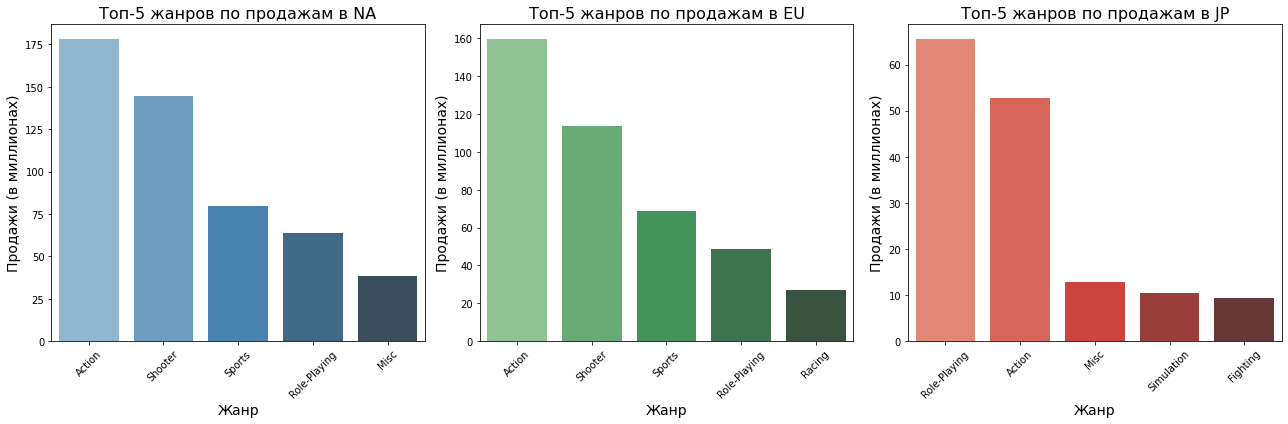

In [60]:
# Визуализация
plt.figure(figsize=(18, 6))

# График для NA
plt.subplot(1, 3, 1)
sns.barplot(data=top_genres_na, x='genre', y='na_sales', palette='Blues_d')
plt.title('Топ-5 жанров по продажам в NA', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

# График для EU
plt.subplot(1, 3, 2)
sns.barplot(data=top_genres_eu, x='genre', y='eu_sales', palette='Greens_d')
plt.title('Топ-5 жанров по продажам в EU', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

# График для JP
plt.subplot(1, 3, 3)
sns.barplot(data=top_genres_jp, x='genre', y='jp_sales', palette='Reds_d')
plt.title('Топ-5 жанров по продажам в JP', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



1. Северная Америка (NA):

   В Северной Америке самыми прибыльными жанрами являются Action, Sports, Shooter, Misc и Role-Playing. 

2. Европа (EU):

   В Европе самыми прибыльными жанрами являются Action, Sports, Shooter, Misc и Racing. 
   
   Хотя этот список отличается от топ-5 жанров в Северной Америке, он также включает игры в жанрах **Action, Sports, Shooter и Misc**, что указывает на их популярность и успешность в обоих регионах. 
   

3. Япония (JP):

   В Японии самыми прибыльными жанрами являются Role-Playing, Action, Misc, Sports и Platform. В отличие от Северной Америки и Европы, жанр Role-Playing возглавляет список самых прибыльных жанров в Японии. 
   
Жанры **Action, Sports, Shooter** успешны во всех рассматриваемых регионах.

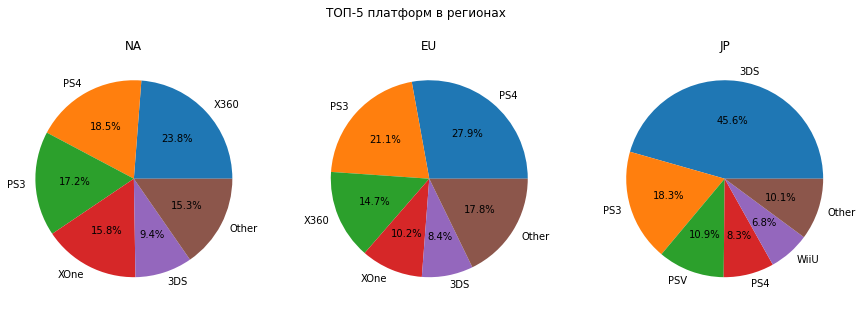

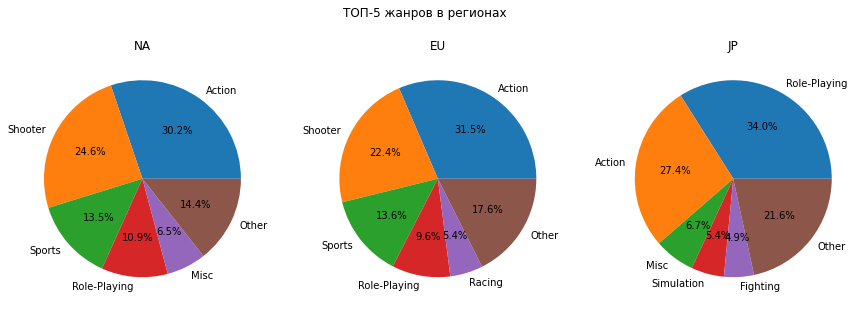

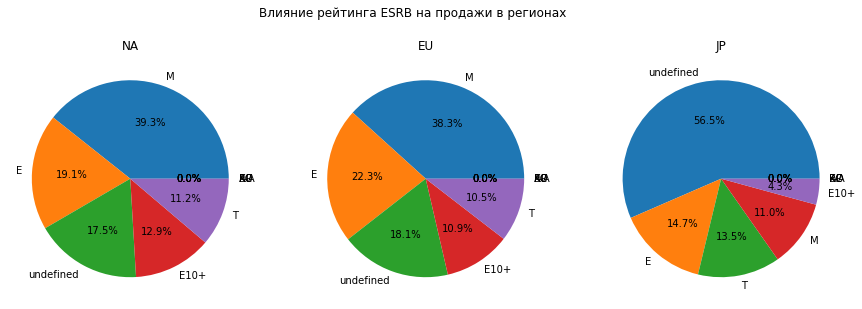

In [65]:
# Комментарий ревьюера 2
tmp = filtered_data.copy()                # делаем копию текущего датасета, что бы не работать с исходным    
parametr = 'platform'                     # задаем имя колонки для построения диаграмм

def pie_chart(df, parametr = 'platform'): # в функцию передаем датасет и имя колонки платформ/жанров/рейтинга
    region = df.columns[4:7]              # создаем список регионов из названий колонок
                                          # начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    if parametr == 'platform':            # будем рисовать диаграммы по платформам
        fig.suptitle('ТОП-5 платформ в регионах')
    elif parametr == 'genre':             # будем рисовать диаграммы по жанрам
        fig.suptitle('ТОП-5 жанров в регионах')
    elif parametr == 'rating':            # будем рисовать диаграммы по возрастному рейтингу
        fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
    for r in range(len(region)):
      if parametr != 'rating':            # здесь будет формировать топ-5 и группу "другие"
                                          # выберем 5 самых продающих платформ/жанров
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True)[:5])
                                          # занесем все остальные продажи в другие палатформы/жанры
        df_r = df_r.append({parametr: 'Other', region[r]: df[region[r]].sum() - df_r[region[r]].sum()}, ignore_index= True)
      else:                               # в возрастном рейтинге строим диаграммы по всем значениям
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True))
        
      axs[r].pie(df_r[region[r]], labels = df_r[parametr], autopct='%1.1f%%')
                                          # зададим название региона.
      axs[r].set_title(df_r.columns[1].split('_')[0].upper())
    plt.show()
    
pie_chart(tmp, parametr)                  # выводим диаграмму
pie_chart(tmp, 'genre')   
pie_chart(tmp, 'rating')   


Данные о продажах по рейтингам ESRB:
      rating  na_sales  eu_sales  jp_sales
0         AO      0.00      0.00      0.00
1          E    112.26    112.81     28.33
2       E10+     75.70     55.37      8.19
3         EC      0.00      0.00      0.00
4        K-A      0.00      0.00      0.00
5          M    231.57    193.96     21.20
6         RP      0.00      0.00      0.00
7          T     66.02     52.96     26.02
8  undefined    103.31     91.50    108.84


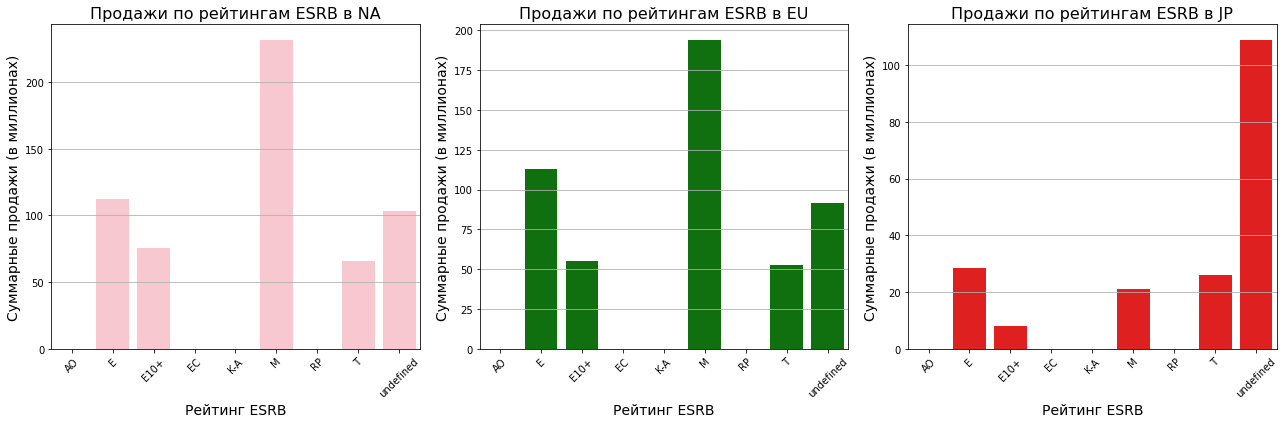

In [61]:
# Группировка данных по рейтингу ESRB и суммирование продаж по регионам
esrb_sales = filtered_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Вывод данных о продажах по рейтингам
print("\nДанные о продажах по рейтингам ESRB:")
print(esrb_sales)

# Визуализация
plt.figure(figsize=(18, 6))

# График для NA
plt.subplot(1, 3, 1)
sns.barplot(x='rating', y='na_sales', data=esrb_sales, color='pink')
plt.title('Продажи по рейтингам ESRB в NA', fontsize=16)
plt.xlabel('Рейтинг ESRB', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# График для EU
plt.subplot(1, 3, 2)
sns.barplot(x='rating', y='eu_sales', data=esrb_sales, color='green')
plt.title('Продажи по рейтингам ESRB в EU', fontsize=16)
plt.xlabel('Рейтинг ESRB', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# График для JP
plt.subplot(1, 3, 3)
sns.barplot(x='rating', y='jp_sales', data=esrb_sales, color='red')
plt.title('Продажи по рейтингам ESRB в JP', fontsize=16)
plt.xlabel('Рейтинг ESRB', fontsize=14)
plt.ylabel('Суммарные продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Наибольшее количество продаж в Северной Америке и Европе  приходится на игры с рейтингом M (для взрослых) и E (для всех возрастов).

В Японии наблюдается значительный скачок продаж игр с неопределенным рейтингом (undefined), что связано с популярностью игр, не имеющих рейтинга.


Влияние рейтинга ESRB на продажи:

Рейтинг M имеет сильные продажи в NA и EU, но минимальные в Японии.
Рейтинг T,E и Е+ показывают хорошие продажи в NA и EU, но минимальные в Японии.

Рейтинг (undefined):
ESRB фокусируется на играх, выпущенных в Северной Америке, и не охватывает глобальный рынок. Игры, выпущенные в других регионах (например, Европе или Азии), могут не проходить процесс рейтинга ESRB, если они не предназначены для североамериканской аудитории.


Рейтинг ESRB влияет на продажи, и высокий интерес к играм с рейтингом М и E подчеркивает его привлекательность для аудитории.


**Рейтинг ESRB влияет на продажи игр. Наиболее успешные — М, E и undefined**

**Портрет пользователя каждого региона:**

**Северная Америка (NA):**

- Предпочитают играть на консолях, особенно на Xbox 360, PlayStation 4 и Xbox One.
- Любят жанры Action, Shooter, Sports и Role-Playing.
- Большинство игр приобретают с рейтингом M (для взрослых) и E (для всех возрастов).

**Европа (EU):**

- Предпочитают играть на консолях, особенно на PlayStation 4, PlayStation 3 и Xbox 360.
- Любят жанры Action, Sports, Shooter и Racing.
- Большинство игр приобретают с рейтингом M (для взрослых) и E (для всех возрастов).

**Япония (JP):**

- Предпочитают играть на портативных системах, особенно на Nintendo 3DS.
- Любят жанры Role-Playing, Action и Misc.
- Большинство игр приобретают с неопределенным рейтингом (undefined) или с рейтингом Е (для всех возрастов).

**Общие тенденции:**

- PS4 и Xbox 360 в NA и EU, в Японии Nintendo 3DS.
- Любовь к жанрам Action, Sports и Shooter.
- Привлекательность рейтингов M (для взрослых) и E (для всех возрастов) для игроков в NA и EU, а также неопределенного рейтинга (undefined) для игроков в JP.


# Шаг 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.



**Формулировка гипотез №1:**

- **Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.**

Сбор данных: Извлечь пользовательские рейтинги для платформ Xbox One и PC.

Проведение t-теста: Использовать t-тест для независимых выборок.

Интерпретация результатов: Оценить значение p-уровня и принять решение о нулевой гипотезе.

In [62]:
# Фильтрация отзывов пользователей 
data_user = filtered_data[filtered_data['user_score'] >= 0]


# Фильтруем данные для Xbox One и PC
xbox_one_scores = data_user[data_user['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data_user[data_user['platform'] == 'PC']['user_score'].dropna()

print(f'Средний пользовательский рейтинг Xbox One: {xbox_one_scores.mean()}') 
print(f'Средний пользовательский рейтинг PC: {pc_scores.mean()}')

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

# Вывод результатов
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу H0: средние пользовательские рейтинги одинаковые.")


Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.4286407766990274
T-Statistic: 0.5930304646661255
P-Value: 0.5535080500643661
Не отвергаем нулевую гипотезу H0: средние пользовательские рейтинги одинаковые.


In [63]:
# Комментарий ревьюера
xbox_one_scores.min(), pc_scores.min()

(1.6, 1.4)

**Формулировка гипотез №2:**

- **Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.**
- **Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.**

Сбор данных: Извлечь пользовательские рейтинги для жанров Action и Sports.

Проведение t-теста: Использовать t-тест для независимых выборок.

Интерпретация результатов: Оценить значение p-уровня и принять решение о нулевой гипотезе.

In [64]:


# Фильтруем данные для жанров Action и Sports
action_scores = data_user[data_user['genre'] == 'Action']['user_score'].dropna()
sports_scores = data_user[data_user['genre'] == 'Sports']['user_score'].dropna()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores)

print(f'Средний пользовательский рейтинг жанра Action: {action_scores.mean()}') 
print(f'Средний пользовательский рейтинг жанра Sports: {sports_scores.mean()}')

# Вывод результатов
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу H0: средние пользовательские рейтинги одинаковые.")

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports: 5.455670103092784
T-Statistic: 10.984175532598625
P-Value: 4.8045233804629176e-26
Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.


# Общий вывод

# Предобработка данных

**Описание данных**
В данном проекте анализируются данные о продажах видеоигр, которые были собраны из открытых источников. Данные представлены в виде таблицы с 16715 записями (игр) и 11 столбцами, которые охватывают различные аспекты игр, такие как название, платформа, год выпуска, жанр, продажи в различных регионах, оценки критиков и пользователей, а также рейтинг ESRB.

**Пропуски в данных**
Были обнаружены пропуски в столбцах name, year_of_release, genre, rating, critic_score и user_score. Пропуски в столбцах name, year_of_release и genre были удалены. Пропуски в столбцах critic_score и user_score были заполнены значением -1, столбцы были приведены к целому и вещественному типу соответственно. Пропущенные значения в 'rating' заменены на "undefined".


**Обработка дубликатов**
Был проведен анализ на наличие дубликатов в данных. Было обнаружено 4 дубликата, которые были удалены из датасета.

**Предобработка данных для анализа**
Предобработка данных включала следующие шаги:

1. Приведение названий столбцов к нижнему регистру.
2. Обработка дубликатов: удаление записей с пропущенными значениями в столбцах name, year_of_release и genre.
3. Заполнение пропусков: пропуски в столбце critic_score и user_score были заполнены значением -1, столбцы были приведены к целому и вещественному типу соответственно.
4. Преобразование типов данных: столбец 'year_of_release' приведен у целому типу, столбец 'rating' к типу category. Пропущенные значения в 'rating' заменены на "undefined".
5. Добавление нового столбца: был добавлен новый столбец total_sales, который представляет собой сумму продаж во всех регионах.


# Вывод по исследовательскому анализу данных

**Выводы по третьему шагу:**

- **Количество выпущенных игр:**

Начиная с 1995 года, наблюдается значительный рост количества выпущенных игр. Особенно заметен скачок в 2001 году, когда было выпущено 482 игры, и в 2002 году, когда количество игр достигло 829. Пик выпуска игр пришелся на 2008 год, когда было выпущено 1427 игр. После этого наблюдается снижение количества выпущенных игр.

- **Продажи по платформам:** 

Платформы с наибольшими суммарными продажами за весь период: PS2, X360, PS3, Wii, DS. Продажи по платформам с наибольшими суммарными продажами за период с 2012 по 2016 год: X360, PS4, Wii, XOne, PS3, WiiU.

X360 имеет наивысшую медиану.


- **Продолжительность жизни платформ:** Средняя продолжительность жизни платформ составляет 7 лет ± 5.9 лет.


- **Влияние отзывов пользователей и критиков на продажи:**

В большинстве случаев наблюдается **слабая положительная корреляция между отзывами пользователей и продажами игр, а также между отзывами критиков и продажами.** Однако сила этой корреляции варьируется в зависимости от платформы и источника отзывов. Wii имеет самую сильную корреляцию между отзывами и продажами, особенно для отзывов пользователей. В остальных случаях **корреляция между отзывами критиков и продажами выше, чем между отзывами пользователей и продажами.**

- **Распределение игр по жанрам:**

Диаграммы размаха для медианных продаж по жанрам показывают, что Shooter, Sports, Platform, Role-Playing и Racing имеют самые высокие медианные продажи, в то время как Puzzle, Adventure и Strategy имеют самые низкие медианные продажи.



# Портрет пользователя каждого региона
**Портрет пользователя каждого региона:**

**Северная Америка (NA):**

- Предпочитают играть на консолях, особенно на Xbox 360, PlayStation 4 и Xbox One.
- Любят жанры Action, Shooter, Sports и Role-Playing.
- Большинство игр приобретают с рейтингом M (для взрослых) и E (для всех возрастов).

**Европа (EU):**

- Предпочитают играть на консолях, особенно на PlayStation 4, PlayStation 3 и Xbox 360.
- Любят жанры Action, Sports, Shooter и Racing.
- Большинство игр приобретают с рейтингом M (для взрослых) и E (для всех возрастов).

**Япония (JP):**

- Предпочитают играть на портативных системах, особенно на Nintendo 3DS.
- Любят жанры Role-Playing, Action и Misc.
- Большинство игр приобретают с неопределенным рейтингом (undefined) или с рейтингом Е (для всех возрастов).

**Общие тенденции:**

- PS4 и Xbox 360 в NA и EU, в Японии Nintendo 3DS.
- Любовь к жанрам Action, Sports и Shooter.
- Привлекательность рейтингов M (для взрослых) и E (для всех возрастов) для игроков в NA и EU, а также неопределенного рейтинга (undefined) для игроков в JP.



# Проверка гипотез 

В заключение, на основе данных анализа, мы не обнаружили значимых различий в средних пользовательских рейтингах платформ Xbox One и PC.

Однако, средние пользовательские рейтинги жанров Action и Sports оказались значимо разными, что указывает на то, что предпочтения пользователей могут варьироваться в зависимости от выбранного жанра.

# На основе анализа данных, можно сделать следующие рекомендации для рекламы видеоигр:

**Наиболее перспективными регионами для продвижения игр являются Северная Америка и Европа.**


**Платформа: Xbox 360
Жанр: Action
Рейтинг ESRB: M (для взрослых)
Регион: Северная Америка (NA)**

**Платформа: PlayStation 4 (PS4)
Жанр: Action
Рейтинг ESRB: M (для взрослых)
Регион: Европа (EU)**


**Платформа: Nintendo 3DS
Жанр: Role-Playing
Рейтинг ESRB: E (для всех возрастов)
Регион: Япония (JP)**



Cтоит обращать внимание на отзывы пользователей и на отзывы критиков, так как в большинстве случаев наблюдается слабая положительная корреляция между отзывами и продажами игр. 